 <h1> KALMAN FILTER </h1>

Kalman filter bu markov modelga o'xshab iterationlar va ketma ket keladigan data(malumot) oqimi orqali keyingi malumot (value) ni taxmin qilish uchun ishlatiladi. Bazan bu filterni ideal filter deb ham a'tashadi. Biz ishlatib turgan uskunalar va  ko'pgina ko'rsatkichlar aslida qandaydir darajada xatoliklarga ega bo'ladi. Masalan choy qaynatgichni olsak, uning termometori ning qaytaradigan qiymatlari juda o'zgaruvchan agar biz uni xuddi shu holida ishlatadigan bo'lsak yoki choyni qaynatmasdan o'chiradi yoki qaynab o'tib ketgandan keyin o'chiradi va energiya isrofi ko'payadi, ikkala holatda ham yo'qotish bor. Biz ushbu muammoni kalman filter orqali yechishimiz mumkin, u kerakli qiymatni oladi va haqiqiy qiymatni qaytaradi iterationlar soni qanchalik ko'p bo'lsa accuracy yoki aniqlik ham shuncha yuqori bo'lib ketaveradi. 

Quyida sizga haqiqiy harorat va termometer qaytargan javoblarning grafigi berilgan , ko'rib turganizdek o'lchangan qiymatlar haqiqiy qiymatdan farq qiladi, va bu uni boshqarishda qiyinchiliklarga sabab bo'lishi mumkin. Kalman filter ning qaytarayotgan qiymatlariga etibor bergan bo'lsangiz u juda tez haqiqiy qiymatga yaqinlashib borayapti.

<img src='jpg/klmnfilter.jpg'/>

reference:

<a href='https://www.google.com/url?sa=i&source=images&cd=&ved=2ahUKEwjx_uKgzJHkAhWJF4gKHf9SAbAQjRx6BAgBEAQ&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DCaCcOwJPytQ&psig=AOvVaw2a65FdVgRIcJf_HMNBh1WO&ust=1566395533530533'> url1 </a>

!!! Agar ushbu method bo'lmaganida ko'pgina ishlarni qilish ancha qiyinlashgan bo'lardi masalan raketani oyga qo'ndirish.


<h2> Code </h2>

In [5]:
#
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline




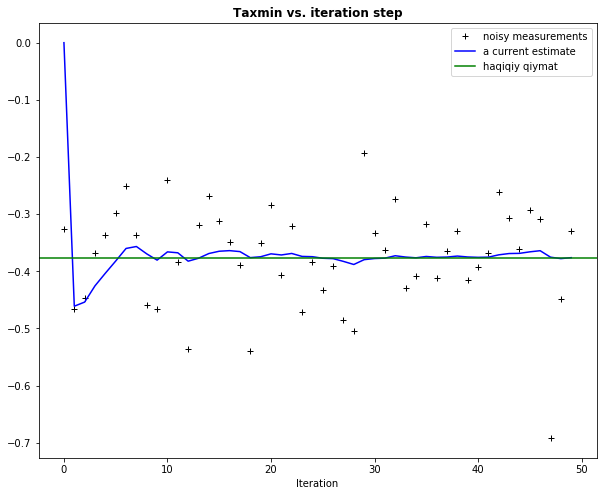

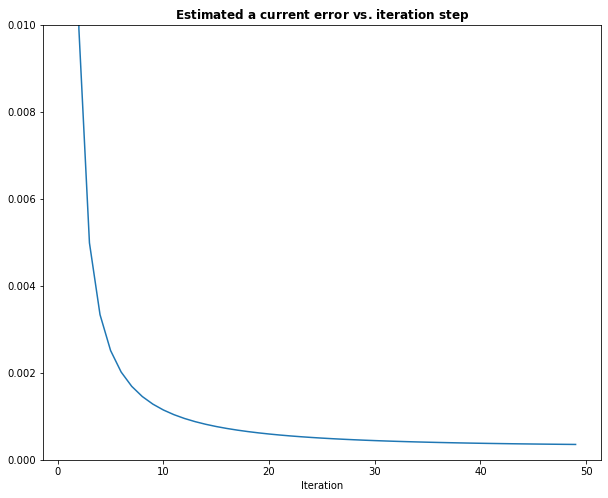

In [7]:
plt.rcParams['figure.figsize'] = (10, 8)

# boshlang`ich parameterlar 
n_iter = 50
sz = (n_iter,) # arrayning hajmi
x = -0.37727 # haqiqiy biz kalman filteri orqali erishmoqchi bo`lgan son 
z = np.random.normal(x,0.1,size=sz) # x ning atrofida joylashgan normal gaussion sonlar

Q = 1e-5 # bu bizning estimationimizning xatoligi

# allocate space for arrays
xhat=np.zeros(sz)      # a current estimate of x
P=np.zeros(sz)         # a current error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # bu esa bizga berilgan qurulma yoki boshqa ning o`lchashdagi noaniqligi (error)

# boshlang`ich qiymatlar
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    #prediction
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a current estimate')
plt.axhline(x,color='g',label='haqiqiy qiymat')
plt.legend()
plt.title('Taxmin vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ current}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()

<h2> Taxmin qilish </h2>

Agar siz ushbu berilganlardan foydalanib keyingi qadamni predict qilmoqchi bo'lsangiz unda current measurementga ya'ni yuqoridagi kodda z[k] ning o'rniga avvalgi taxmindan xhat[k-1] dan foydalaning.